In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Filepath
filepath = "Cleaned_Randomized_df.csv"

# Read the CSV file, converting relevant columns to correct data types
df = pd.read_csv(filepath, dtype={'Domestic': float, 'International': float, 'Budget': float})

# # Drop rows where the `Budget` column is null
# df = df.dropna(subset=['Budget'])

# # Create new columns using assign and store in a new variable
# # This line starts the creation of a new DataFrame called df_modified by using the assign method in Pandas. 
# # This method allows you to create new columns in a DataFrame based on existing columns.
# df_modified = df.assign(
#     # This line creates a new column named num_genre in the df_modified DataFrame.
#     # It calculates the number of genres for each movie by splitting the values in the 'Genres' column using a semicolon as the delimiter 
#     # and then counting the number of resulting elements in the list.
#     num_genre=df['Genres'].astype(str).str.split(';').str.len(),
#     # This line randomly selects one genre from the list of genres for each book in the 'Genres' column. 
#     # The apply method with a lambda function is used to achieve this random selection.
#     main_genre=df['Genres'].astype(str).str.split(';').apply(lambda x: np.random.choice(x)),
#     # This line calculates the total revenue for each book by adding the 'Domestic' and 'International' revenue columns. 
#     # Any missing values are filled with 0 using the fillna method.
#     total_revenue=df['Domestic'].fillna(0) + df['International'].fillna(0),
#     # This line removes the year information enclosed in parentheses from the 'Title' column by using a regular expression pattern to replace it with an empty string.
#     title_without_year=df['Title'].astype(str).str.replace(r"\([^()]*\)", "", regex=True),
#     # This line extracts the year information from the 'Title' column using a regular expression pattern and converts it to a numeric data type using pd.to_numeric.
#     year=pd.to_numeric(df['Title'].astype(str).str.extract(r'\((\d+)\)')[0])  # Extract and convert to numeric
# )
# # Convert financial columns to integers
# # This code fills any missing values in the 'Domestic' column with 0 using fillna(0) and then converts the values in the column to integers using astype(int).
# df_modified['Domestic'] = df_modified['Domestic'].fillna(0).astype(int)
# df_modified['International'] = df_modified['International'].fillna(0).astype(int)
# df_modified['Budget'] = df_modified['Budget'].fillna(0).astype(int)
# df_modified['total_revenue'] = df_modified['total_revenue'].astype(int)

# # Create new columns for currency display
# df_modified['Budget_$'] = df_modified['Budget'].apply(lambda x: f'${x:,.0f}')
# df_modified['Domestic_$'] = df_modified['Domestic'].apply(lambda x: f'${x:,.0f}')
# df_modified['International_$'] = df_modified['International'].apply(lambda x: f'${x:,.0f}')
# df_modified['total_revenue_$'] = df_modified['total_revenue'].apply(lambda x: f'${x:,.0f}')

# # Preprocessing steps with method chaining on df_modified
# df_modified = (
#     df_modified
#     .loc[~((df_modified['num_genre'] > 1) & (df_modified['main_genre'] == 'Drama'))]  # Filter after creating new columns
#     .sort_values(by='total_revenue', ascending=False)
#     [['title_without_year', 'year', 'main_genre', 'MPAA-Rating', 'Runtime',
#       'Distributor', 'Budget_$', 'Domestic_$', 'International_$', 'total_revenue_$']]  # Display currency columns
# )

In [3]:
df.head()

,Unnamed: 0,title_without_year,year,main_genre,MPAA-Rating,Runtime,Distributor,Budget_$,Domestic_$,International_$,total_revenue_$
0,103,Avatar,2009,Action,PG-13,162,Twentieth Century Fox,"$237,000,000","$749,766,139","$1,993,811,448","$2,743,577,587"
1,1,Star Wars: Episode VII - The Force Awakens,2015,Action,PG-13,138,Walt Disney Studios Motion Pictures,"$245,000,000","$936,662,225","$1,131,561,399","$2,068,223,624"
2,0,Jurassic World,2015,Sci-Fi,PG-13,124,Universal Pictures,"$150,000,000","$652,270,625","$1,018,130,012","$1,670,400,637"
3,188,The Lion King,2019,Adventure,PG,118,Walt Disney Studios Motion Pictures,"$260,000,000","$543,638,043","$1,113,305,351","$1,656,943,394"
4,128,The Avengers,2012,Adventure,PG-13,143,Walt Disney Studios Motion Pictures,"$220,000,000","$623,357,910","$895,455,078","$1,518,812,988"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1995 non-null   int64 
 1   title_without_year  1995 non-null   object
 2   year                1995 non-null   int64 
 3   main_genre          1995 non-null   object
 4   MPAA-Rating         1948 non-null   object
 5   Runtime             1995 non-null   int64 
 6   Distributor         1995 non-null   object
 7   Budget_$            1995 non-null   object
 8   Domestic_$          1995 non-null   object
 9   International_$     1995 non-null   object
 10  total_revenue_$     1995 non-null   object
dtypes: int64(3), object(8)
memory usage: 171.6+ KB


In [5]:
df.describe()

,Unnamed: 0,year,Runtime
count,1995.000000,1995.000000,1995.000000
mean,1530.827068,2009.631078,108.705764
std,971.253647,5.747725,18.192252
min,0.000000,1999.000000,63.000000
25%,632.500000,2005.000000,95.000000
50%,1555.000000,2010.000000,106.000000
75%,2340.000000,2015.000000,119.000000
max,3389.000000,2020.000000,219.000000


In [7]:
df.dtypes

Unnamed: 0             int64
title_without_year    object
year                   int64
main_genre            object
MPAA-Rating           object
Runtime                int64
Distributor           object
Budget_$              object
Domestic_$            object
International_$       object
total_revenue_$       object
dtype: object

In [9]:
# Clean 'budget' column by removing dollar sign and commas
df['Budget_$'] = df['Budget_$'].str.replace('[$,]', '', regex=True)
df['total_revenue_$'] = df['total_revenue_$'].str.replace('[$,]', '', regex=True)

In [10]:
# Convert 'total_revenue' and 'budget' columns to numeric data types
df['total_revenue_$'] = pd.to_numeric(df['total_revenue_$'], errors='coerce')
df['Budget_$'] = pd.to_numeric(df['Budget_$'], errors='coerce')

In [11]:
# Create the 'profit' column
df['profit'] = df['total_revenue_$'] - df['Budget_$']

In [ ]:
# Combine the profits for 'DreamWorks' and 'DreamWorks Distribution'
avg_profit_by_distributor.loc['DreamWorks'] += avg_profit_by_distributor.loc['DreamWorks Distribution']

# Drop the 'DreamWorks Distribution' entry
avg_profit_by_distributor = avg_profit_by_distributor.drop('DreamWorks Distribution')

In [12]:
df.head()

,Unnamed: 0,title_without_year,year,main_genre,MPAA-Rating,Runtime,Distributor,Budget_$,Domestic_$,International_$,total_revenue_$,profit
0,103,Avatar,2009,Action,PG-13,162,Twentieth Century Fox,237000000,"$749,766,139","$1,993,811,448",2743577587,2506577587
1,1,Star Wars: Episode VII - The Force Awakens,2015,Action,PG-13,138,Walt Disney Studios Motion Pictures,245000000,"$936,662,225","$1,131,561,399",2068223624,1823223624
2,0,Jurassic World,2015,Sci-Fi,PG-13,124,Universal Pictures,150000000,"$652,270,625","$1,018,130,012",1670400637,1520400637
3,188,The Lion King,2019,Adventure,PG,118,Walt Disney Studios Motion Pictures,260000000,"$543,638,043","$1,113,305,351",1656943394,1396943394
4,128,The Avengers,2012,Adventure,PG-13,143,Walt Disney Studios Motion Pictures,220000000,"$623,357,910","$895,455,078",1518812988,1298812988


In [46]:
avg_profit_by_distributor = df.groupby('Distributor')['profit'].mean()
# Set display format to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Sort the average profit values in ascending order
avg_profit_by_distributor = avg_profit_by_distributor.sort_values(ascending = False)
# avg_profit_by_distributor2 = pd.DataFrame(avg_profit_by_distributor)
avg_profit_by_distributor = pd.DataFrame(avg_profit_by_distributor)
avg_profit_by_distributor

,profit
Distributor,
The H Collective,840225439.00
DreamWorks,280821804.85
Walt Disney Studios Motion Pictures,256328376.31
Neon,247374734.00
Newmarket Films,175060504.50
...,...
Studio 8,-3042518.00
Picturehouse (II),-10024188.00
Annapurna Pictures,-10644900.00


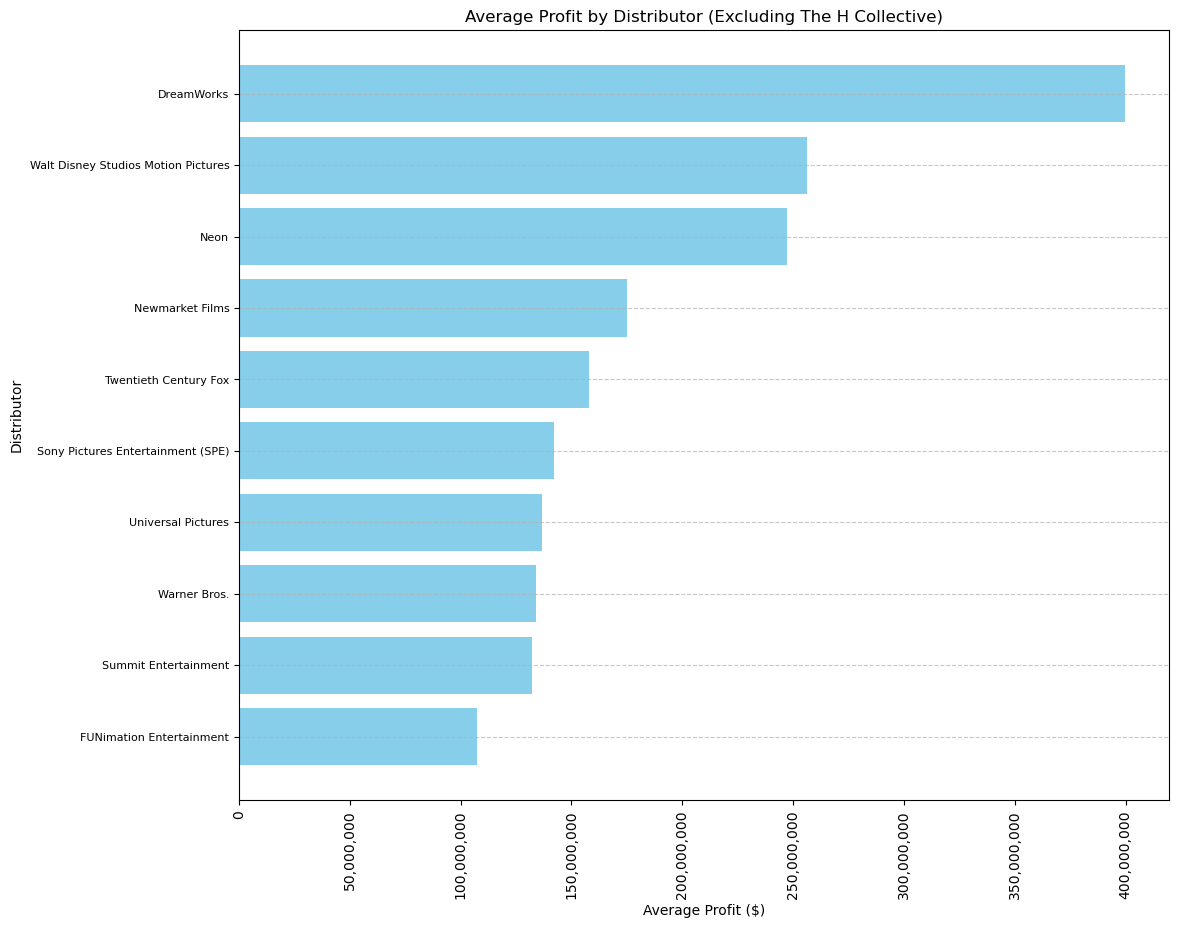

In [57]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filter out negative profit values and 'The H Collective' distributor
filtered_df = avg_profit_by_distributor[(avg_profit_by_distributor['profit'] >= 0) & (avg_profit_by_distributor.index != 'The H Collective')]

# Select top 10 based on average profit and reverse the order
top_10_distributors = filtered_df.nlargest(10, 'profit')[::-1]

# Create a bar chart with the filtered data
plt.figure(figsize=(12, 10))
plt.barh(top_10_distributors.index, top_10_distributors['profit'], color='skyblue')
plt.xlabel('Average Profit ($)')
plt.ylabel('Distributor')
plt.title('Average Profit by Distributor (Excluding The H Collective)')
plt.xticks(rotation=90)
plt.yticks(fontsize=8)
# Format x-axis tick labels to prevent scientific notation
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

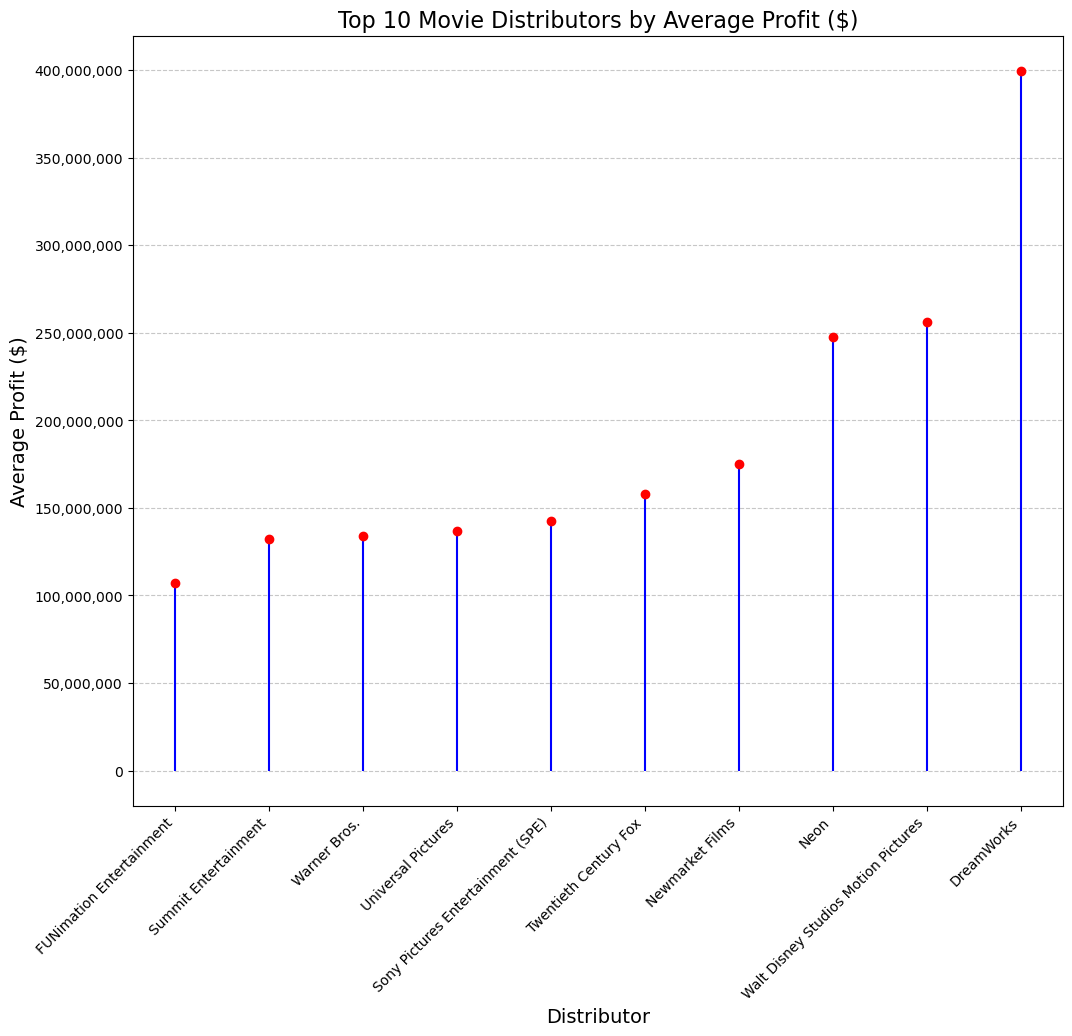

In [61]:
# Filter out negative profit values and 'The H Collective' distributor
filtered_df = avg_profit_by_distributor[(avg_profit_by_distributor['profit'] >= 0) & (avg_profit_by_distributor.index != 'The H Collective')]

# Select top 10 based on average profit and reverse the order
top_10_distributors = filtered_df.nlargest(10, 'profit')[::-1]

# Create a lollipop chart with the top 10 movie distributors
plt.figure(figsize=(12, 10))
plt.stem(top_10_distributors.index, top_10_distributors['profit'], linefmt='b-', markerfmt='ro', basefmt=' ')

plt.xlabel('Distributor', fontsize=14)  # Set x-axis label
plt.ylabel('Average Profit ($)', fontsize=14)  # Set y-axis label
plt.title('Top 10 Movie Distributors by Average Profit ($)', fontsize=16)  # Set title
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines on the y-axis

plt.show()

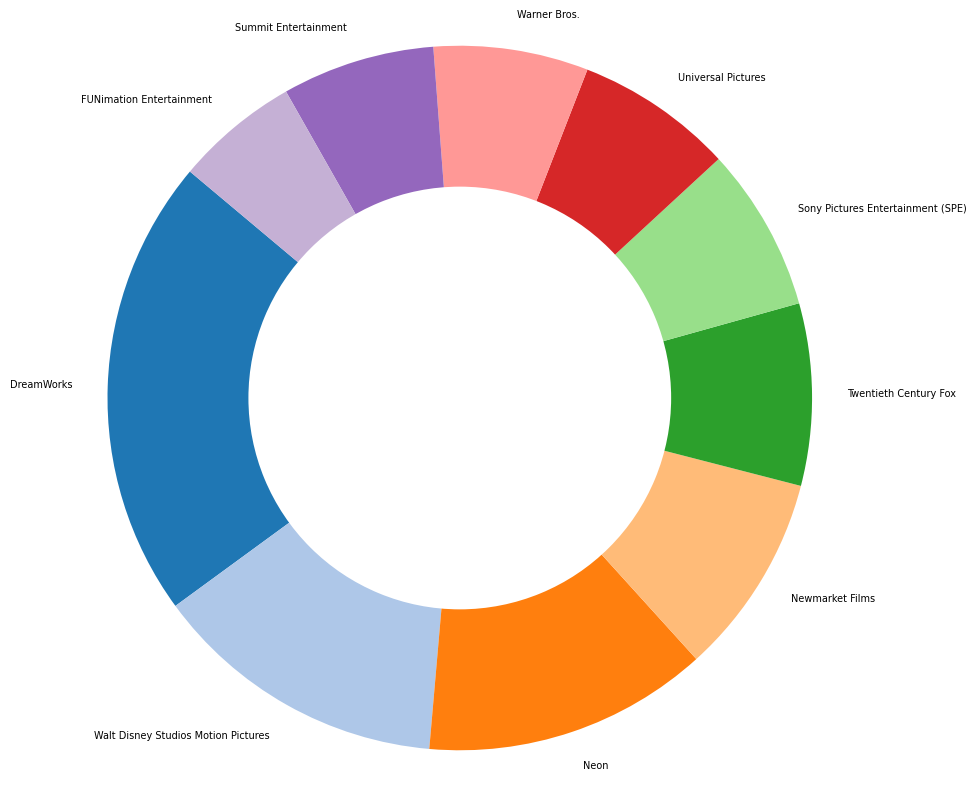

In [68]:
# Calculate percentage of each slice
sizes = filtered_df['profit']
total = sum(sizes)
percentages = sizes / total * 100

# Define a threshold percentage for small slices
threshold_percentage = 1  # Adjust threshold as needed

# Group small slices into "Other" category
other_size = sizes[percentages < threshold_percentage].sum()
filtered_sizes = sizes[percentages >= threshold_percentage]
filtered_labels = filtered_df.index[percentages >= threshold_percentage].tolist()
filtered_sizes = filtered_sizes.tolist() + [other_size]
filtered_labels.append('Other')

# Select only the top 10 slices
top_10_sizes = filtered_sizes[:10]
top_10_labels = filtered_labels[:10]

# Create a donut pie chart with the top 10 slices and "Other"
plt.rcParams['font.size'] = 7
plt.figure(figsize=(10, 10))

# Outer pie chart (larger circle)
outer_colors = plt.cm.tab20.colors
plt.pie(top_10_sizes, labels=top_10_labels, colors=outer_colors, startangle=140, radius=1)

# Inner pie chart (smaller circle)
inner_colors = plt.cm.tab20b.colors
plt.pie([1], colors='w', radius=0.6)

plt.axis('equal')

plt.show()

In [72]:
# Group by 'Distributor' and 'Genre', then count the number of movies in each genre for each distributor
genre_count_by_distributor = df.groupby(['Distributor', 'main_genre']).size()
# Reset the index to make the result a DataFrame
genre_count_by_distributor = genre_count_by_distributor.reset_index(name='Movie Count')
# Display the total amount of each genre released by each distributor
print(genre_count_by_distributor)

                   Distributor main_genre  Movie Count
0                          A24      Crime            1
1                          A24      Drama            1
2                          A24    Mystery            1
3                          A24   Thriller            1
4                 Affirm Films  Biography            1
..                         ...        ...          ...
443  Yari Film Group Releasing    Mystery            1
444             Yash Raj Films     Action            2
445             Yash Raj Films    Romance            1
446             Yash Raj Films      Sport            1
447                      truTV     Comedy            1

[448 rows x 3 columns]


<Figure size 1200x600 with 0 Axes>

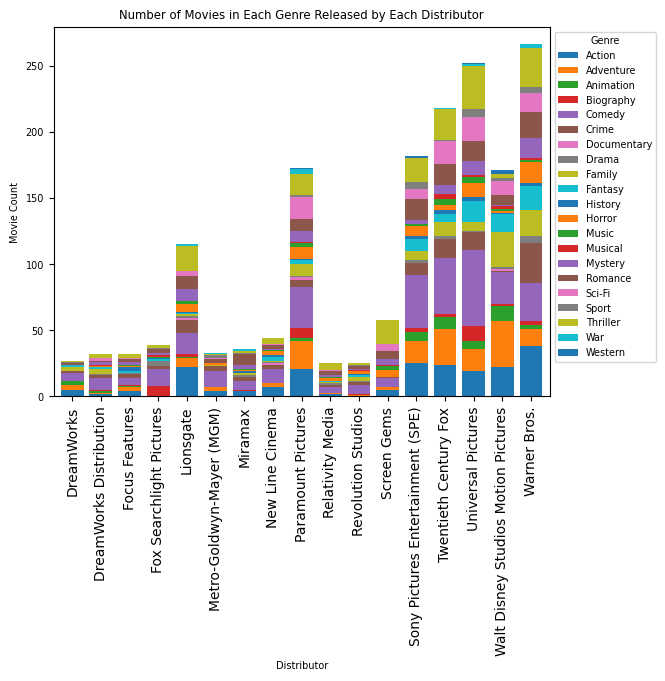

In [77]:
# Calculate the total number of movies for each distributor
distributor_movie_count = genre_count_by_distributor.groupby('Distributor')['Movie Count'].sum()

# Select the top 10 distributors based on the total number of movies
top_10_distributors = distributor_movie_count.nlargest(10).index

# # Filter out distributors with less than 25 movies
# filtered_distributors = distributor_movie_count[distributor_movie_count >= 25].index

# Filter the original DataFrame based on the filtered distributors
filtered_data = genre_count_by_distributor[genre_count_by_distributor['Distributor'].isin(filtered_distributors)]

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a Stacked Bar Chart with the filtered data
filtered_data.pivot(index='Distributor', columns='main_genre', values='Movie Count').plot(kind='bar', stacked=True, width=0.8)

plt.xlabel('Distributor')
plt.ylabel('Movie Count')
plt.title('Number of Movies in Each Genre Released by Each Distributor')
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Genre', bbox_to_anchor=(1, 1))

plt.show()

In [81]:
df.groupby('main_genre').profit.mean()

main_genre
Action        181436072.71
Adventure     223185888.42
Animation     240250762.70
Biography      72861912.69
Comedy         79014662.11
Crime          63094490.51
Documentary    17040932.14
Drama          58396992.51
Family        145487558.27
Fantasy       161843883.39
History        80521490.26
Horror         81013536.12
Music          99640520.21
Musical       117911456.46
Mystery       104135412.70
Romance        69899298.40
Sci-Fi        184448217.93
Sport          53026574.72
Thriller       99035099.44
War            25805603.00
Western        42354351.88
Name: profit, dtype: float64

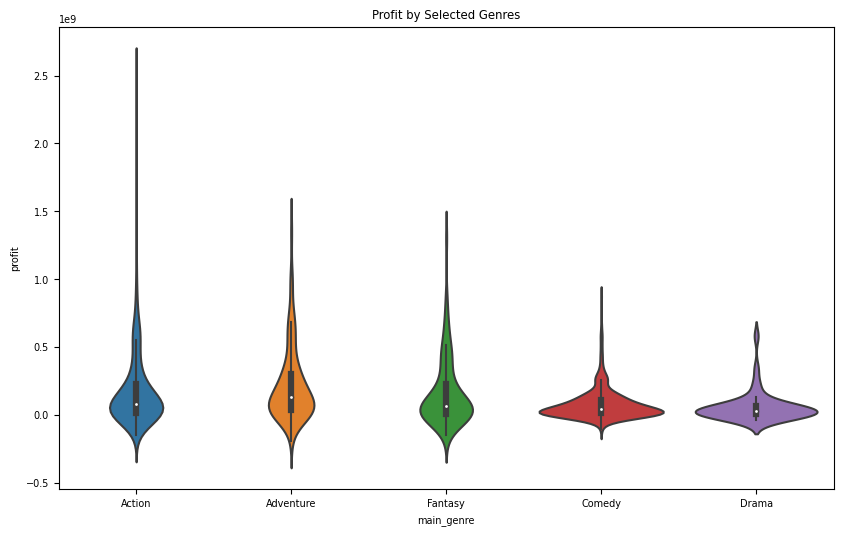

In [90]:
# List of genres you want to include in the violin plot
selected_genres = ['Action', 'Drama', 'Comedy', 'Adventure', 'Fantasy']

# Filter the DataFrame df to include only the selected genres
df_selected_genres = df[df['main_genre'].isin(selected_genres)]

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_selected_genres, x='main_genre', y='profit')
plt.title('Profit by Selected Genres')
plt.show()

In [93]:
# Filter the DataFrame to include only the "Action" genre
df_action = df[df['main_genre'] == 'Action']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df_action['profit'].quantile(0.25)
Q3 = df_action['profit'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Locate potential outliers in the "Action" genre
outliers = df_action[(df_action['profit'] < lower_bound) | (df_action['profit'] > upper_bound)]

print("Potential outliers in the 'Action' genre:")
outliers = pd.DataFrame(outliers)
outliers

Potential outliers in the 'Action' genre:


,Unnamed: 0,title_without_year,year,main_genre,MPAA-Rating,Runtime,Distributor,Budget_$,Domestic_$,International_$,total_revenue_$,profit
0,103,Avatar,2009,Action,PG-13,162,Twentieth Century Fox,237000000,"$749,766,139","$1,993,811,448",2743577587,2506577587
1,1,Star Wars: Episode VII - The Force Awakens,2015,Action,PG-13,138,Walt Disney Studios Motion Pictures,245000000,"$936,662,225","$1,131,561,399",2068223624,1823223624
7,2,Avengers: Age of Ultron,2015,Action,PG-13,141,Walt Disney Studios Motion Pictures,250000000,"$459,005,868","$943,800,000",1402805868,1152805868
8,167,Star Wars: Episode VIII - The Last Jedi,2017,Action,PG-13,152,Walt Disney Studios Motion Pictures,317000000,"$620,181,382","$712,358,507",1332539889,1015539889
19,119,Transformers: Dark of the Moon,2011,Action,PG-13,154,DreamWorks,195000000,"$352,390,543","$771,403,536",1123794079,928794079
22,129,The Dark Knight Rises,2012,Action,PG-13,164,Warner Bros.,250000000,"$448,139,099","$632,902,188",1081041287,831041287
24,192,Star Wars: Episode IX - The Rise of Skywalker,2019,Action,PG-13,141,Walt Disney Studios Motion Pictures,275000000,"$515,202,542","$558,941,706",1074144248,799144248
27,69,Pirates of the Caribbean: Dead Man's Chest,2006,Action,PG-13,151,Walt Disney Studios Motion Pictures,225000000,"$423,315,812","$642,863,913",1066179725,841179725
38,82,Pirates of the Caribbean: At World's End,2007,Action,PG-13,169,Walt Disney Studios Motion Pictures,300000000,"$309,420,425","$651,576,067",960996492,660996492
40,100,Harry Potter and the Half-Blood Prince,2009,Action,PG,153,Warner Bros.,250000000,"$301,959,197","$632,000,000",933959197,683959197


In [103]:
# Filter out the outliers from the original DataFrame
df_cleaned = df[~df.index.isin(outliers.index)]

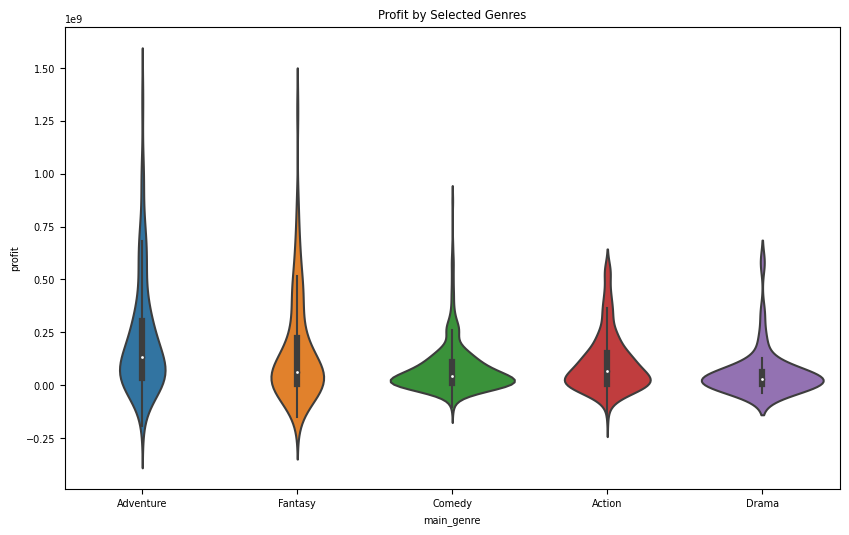

In [105]:
# List of genres you want to include in the violin plot
selected_genres = ['Action', 'Drama', 'Comedy', 'Adventure', 'Fantasy']

# Filter the DataFrame df to include only the selected genres
df_selected_genres = df_cleaned[df_cleaned['main_genre'].isin(selected_genres)]

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_selected_genres, x='main_genre', y='profit')
plt.title('Profit by Selected Genres')
plt.show()